In [55]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Combine the data into a single dataset and remove drugs outside of scope
mouse_df = pd.read_csv("data/mouse_drug_data.csv")
trial_df = pd.read_csv("data/clinicaltrial_data.csv")
drugs_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"] 
merged_df = trial_df.merge(mouse_df)
comb_df = merged_df[merged_df["Drug"].isin(drugs_list)]

In [57]:
#dataframe to calc average tumor size by drug|timepoint and pivot
avgsize_df = comb_df.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean().pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

#avg size error for error bars
avgerror_size_df = comb_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().to_frame()
avgerror_size_pivot = pd.pivot_table(avgerror_size_df, values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")

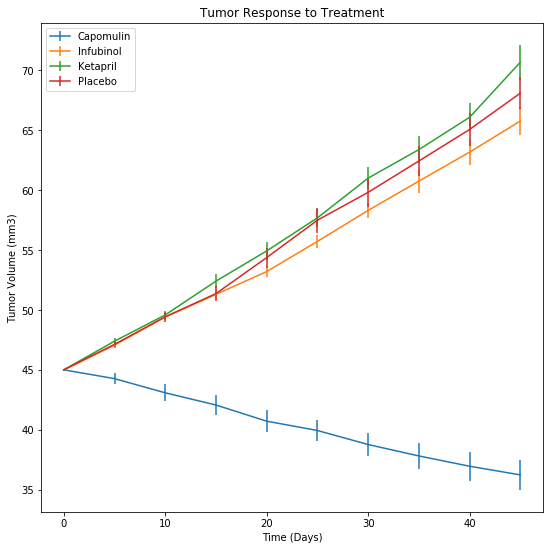

In [59]:
#create size chart
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.errorbar(avgsize_df.index, avgsize_df["Capomulin"], yerr=avgerror_size_pivot["Capomulin"])
plt.errorbar(avgsize_df.index, avgsize_df["Infubinol"], yerr=avgerror_size_pivot["Infubinol"])
plt.errorbar(avgsize_df.index, avgsize_df["Ketapril"], yerr=avgerror_size_pivot["Ketapril"])
plt.errorbar(avgsize_df.index, avgsize_df["Placebo"], yerr=avgerror_size_pivot["Placebo"])
plt.legend(avgsize_df, loc=2)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

## Metastatic Response to Treatment

In [60]:
#dataframe to calc average metastasis by drug|timepoint and pivot
avgmeta_df = comb_df.groupby(["Drug","Timepoint"], as_index=False)["Metastatic Sites"].mean().pivot(index="Timepoint", columns= "Drug", values="Metastatic Sites")

#avg metastatic error for error bars
avgerror_meta_df = comb_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().to_frame()
avgerror_meta_pivot = pd.pivot_table(avgerror_meta_df, values="Metastatic Sites", index="Timepoint", columns="Drug")

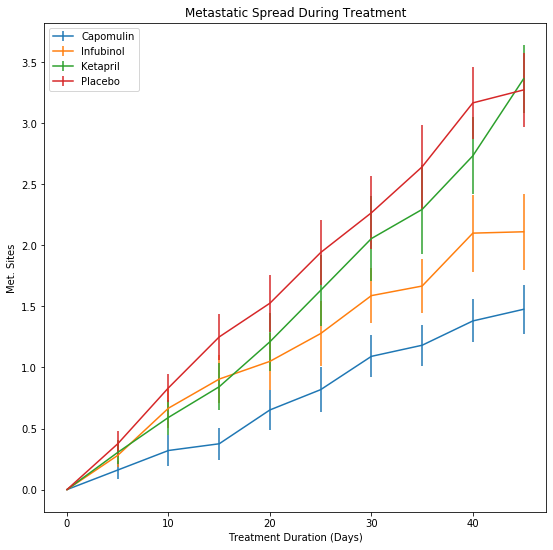

In [61]:
#create metastatsis chart
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.errorbar(avgmeta_df.index, avgmeta_df["Capomulin"], yerr=avgerror_meta_pivot["Capomulin"])
plt.errorbar(avgmeta_df.index, avgmeta_df["Infubinol"], yerr=avgerror_meta_pivot["Infubinol"])
plt.errorbar(avgmeta_df.index, avgmeta_df["Ketapril"], yerr=avgerror_meta_pivot["Ketapril"])
plt.errorbar(avgmeta_df.index, avgmeta_df["Placebo"], yerr=avgerror_meta_pivot["Placebo"])
plt.legend(avgmeta_df, loc=2)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

## Survival Rates

In [62]:
#dataframe to count surviving mice by drug|timepoint and pivot
mice_df = comb_df.groupby(["Drug","Timepoint"], as_index=False)["Mouse ID"].count().pivot(index="Timepoint", columns= "Drug", values="Mouse ID")

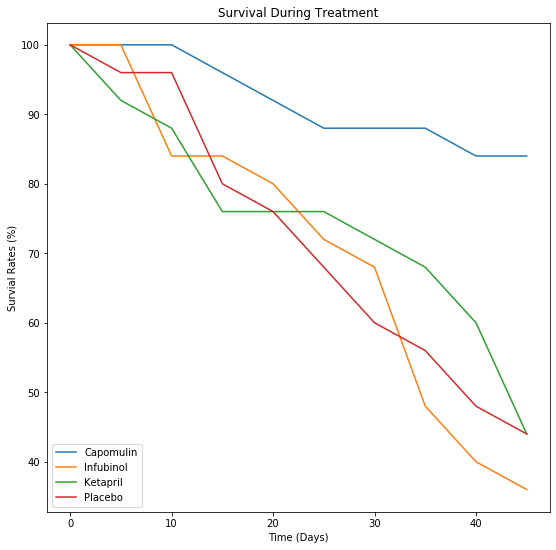

In [63]:
#create survival chart
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survial Rates (%)")
plt.plot(mice_df/25*100)
plt.legend(mice_df, loc=3)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

## Summary Bar Graph

In [64]:
# Calculate the percent changes for each drug
result_df = avgsize_df[avgsize_df.index.isin(["0","45"])]
volchange = (result_df.iloc[1] - result_df.iloc[0]) / result_df.iloc[0]

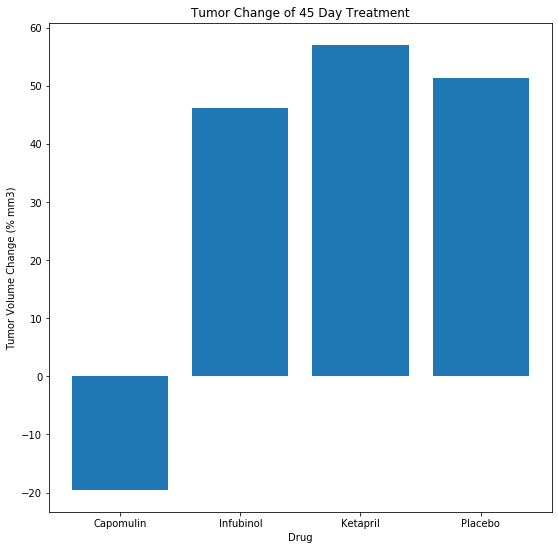

In [77]:
#create bar chart
plt.title("Tumor Change of 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("Tumor Volume Change (% mm3)")
plt.bar(drugs_list, volchange * 100)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()